In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url ="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(url)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
x = df["horsepower"]
y = df["mpg"]

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [23]:
df = df.dropna(subset=["horsepower"])

In [24]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
df = df.drop_duplicates()

In [14]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

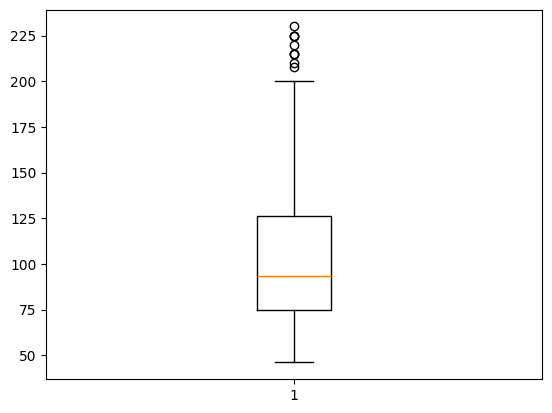

In [26]:
plt.boxplot(df["horsepower"].dropna())
plt.show()

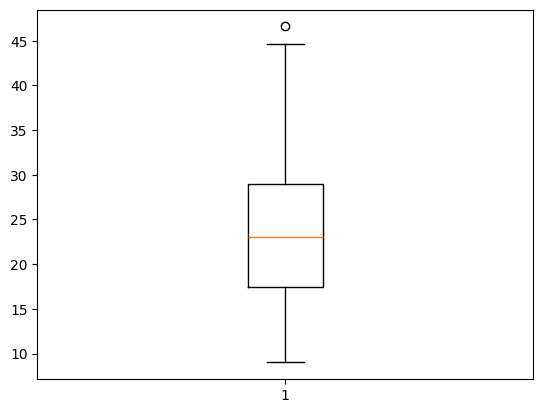

In [19]:
plt.boxplot(df["mpg"].dropna())
plt.show()

In [27]:
Q1=df["horsepower"].quantile(0.25)
Q3=df["horsepower"].quantile(0.75)
IQR=Q3-Q1

outliers = df[(df["horsepower"] < Q1 - 1.5 * IQR) | (df["horsepower"] > Q3 + 1.5 * IQR)]
print(outliers)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
13   14.0          8         455.0       225.0    3086          10.0   
25   10.0          8         360.0       215.0    4615          14.0   
27   11.0          8         318.0       210.0    4382          13.5   
67   11.0          8         429.0       208.0    4633          11.0   
94   13.0          8         440.0       215.0    4735          11.0   
95   12.0          8         455.0       225.0    4951          11.0   
116  16.0          8         400.0       230.0    4278           9.5   

     model_year origin                          name  
6            70    usa              chevrolet impala  
7            70    usa             plymouth fury iii  
8            70    usa              pontia

slope (w): -0.15784473335365362
intercept (b): 40.00451551814514


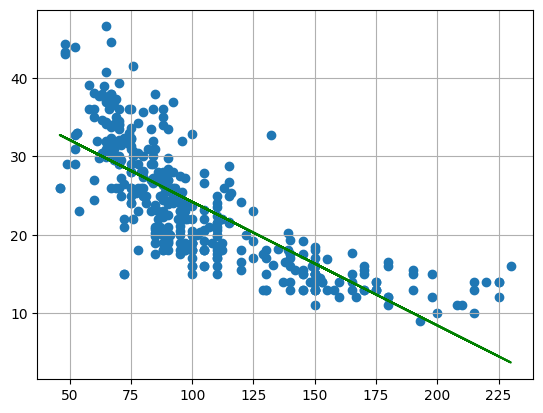

In [29]:
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

w = numerator / denominator
b = y_mean - w * x_mean 

y_pred = w * x + b

print("slope (w):", w)
print("intercept (b):", b)

plt.scatter(x, y)
plt.plot(x, y_pred, color='green')
plt.grid(True)
plt.show()

In [31]:
model = LinearRegression()
x = df[['horsepower']]
y = df['mpg']
model.fit(x,y)

print("intercept", model.intercept_)
print("slope:", model.coef_[0])

intercept 39.93586102117047
slope: -0.15784473335365365
